In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [3]:
#Read and store the dataset
df = pd.read_csv('dataset.csv')
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889470e+11,Very Slow,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,NaN,NaN,1.407011,314.373913,57.257470,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,Slow,65210.34609,40519.17311,NaN,NaN,57298148.0,35603420.0,NaN,2458000.5,1.107776,136.717242,NaN,1.497352,2457794.969,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,NaN,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,4.557,2458000.5,1.458824,259.475979,248.415038,1.966857,2458120.468,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901570e+11,Very Slow,40225.94819,24994.83986,NaN,NaN,NaN,26522368.0,5.093,2458000.5,NaN,57.173266,NaN,1.527904,2457902.337,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901570e+11,Very Slow,35426.99179,NaN,0.407832,158.646713,61010824.0,NaN,5.154,NaN,1.225615,84.629307,158.263596,NaN,2457814.455,NaN,NaN,NaN,NaN,15.0,NaN,Low,True


In [5]:
df[abs(df['Relative Velocity km per hr']*0.621371-df['Miles per hour'])>2].Name
#From this we can say that the conversions used are correct and have a very less error margin

Series([], Name: Name, dtype: int64)

In [6]:
#Fill the Nan values of relative velocity by back conversion
df['Relative Velocity km per hr']=df['Relative Velocity km per hr'].fillna(df['Miles per hour']/0.621371)

In [7]:
rel_grp_df= df.groupby('Relative Velocity km per sec')[['Relative Velocity km per hr']].mean()
rel_grp_df

,Relative Velocity km per hr
Relative Velocity km per sec,
Fast,94548.457472
Slow,57819.095395
Very Fast,133550.964259
Very Slow,26987.390474


In [8]:
#Now we again fill the empty values of relative velocity km per hr using these values
df.loc[(df['Relative Velocity km per hr'].isna()) & (df['Relative Velocity km per sec'] == 'Fast'), 'Relative Velocity km per hr'] = 94548.457472
df.loc[(df['Relative Velocity km per hr'].isna()) & (df['Relative Velocity km per sec'] == 'Slow'), 'Relative Velocity km per hr'] = 57819.095395
df.loc[(df['Relative Velocity km per hr'].isna()) & (df['Relative Velocity km per sec'] == 'Very Fast'), 'Relative Velocity km per hr'] = 133550.96426
df.loc[(df['Relative Velocity km per hr'].isna()) & (df['Relative Velocity km per sec'] == 'Very Slow'), 'Relative Velocity km per hr'] = 26987.390474

In [9]:
#A similar logic can be applied to fill the missing values of MissDistance(KM)
df['Miss Dist.(kilometers)'] = df['Miss Dist.(kilometers)'].fillna(df['Miss Dist.(Astronomical)']*149597871)
df['Miss Dist.(kilometers)'] = df['Miss Dist.(kilometers)'].fillna(df['Miss Dist.(lunar)']*384399)
df['Miss Dist.(kilometers)'] = df['Miss Dist.(kilometers)'].fillna(df['Miss Dist.(miles)']/0.621371)

In [10]:
#Now we can drop those unnecessary columns
df = df.drop(columns=['Relative Velocity km per sec','Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)'])
df.head()

,Name,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889470e+11,22017.00380,6.275369e+07,NaN,NaN,1.407011,314.373913,57.257470,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,65210.34609,5.729815e+07,NaN,2458000.5,1.107776,136.717242,NaN,1.497352,2457794.969,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,27326.56018,7.622912e+06,4.557,2458000.5,1.458824,259.475979,248.415038,1.966857,2458120.468,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901570e+11,40225.94819,4.268363e+07,5.093,2458000.5,NaN,57.173266,NaN,1.527904,2457902.337,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901570e+11,35426.99179,6.101082e+07,5.154,NaN,1.225615,84.629307,158.263596,NaN,2457814.455,NaN,NaN,NaN,NaN,15.0,NaN,Low,True


In [11]:
#Encode the categorical columns
df['Orbital Period'] = df['Orbital Period'].replace({'Low':0,'Medium':1,'High':2})
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].replace({'Low':0,'Medium':1,'High':2})
df['Hazardous'] = df['Hazardous'].replace({False:0,True:1})

C:\Users\Rahul\AppData\Local\Temp\ipykernel_25968\2668644283.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Orbital Period'] = df['Orbital Period'].replace({'Low':0,'Medium':1,'High':2})
C:\Users\Rahul\AppData\Local\Temp\ipykernel_25968\2668644283.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Orbit Uncertainity'] = df['Orbit Uncertainity'].replace({'Low':0,'Medium':1,'High':2})
C:\Users\Rahul\AppData\Local\Temp\ipykernel_25968\2668644283.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and wi

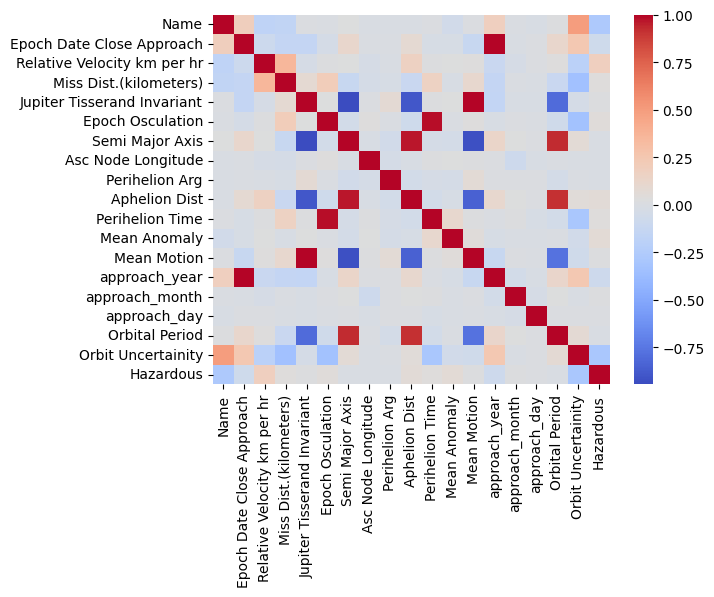

In [12]:
corr_mat = df.corr()
sns.heatmap(corr_mat,cmap= 'coolwarm')
plt.show()
#We see that Jupiter Tisserand and Semi major are inversely related

In [13]:
#universal gravitational Constant
G = 6.67430e-11
# Mass of the Sun (kg)
M_sun = 1.989e30 
df['Mean Motion']=df['Mean Motion']*np.pi/180      #Converting to radians
df['Semi Major Axis'] = df['Semi Major Axis'].fillna(6.5/df['Jupiter Tisserand Invariant'])
df['Semi Major Axis']= df['Semi Major Axis'].fillna(((G*M_sun/((df['Mean Motion']/(24*3600))**2))**(1/3))/149597870700)

# 2.Feature Engineering


 ## Time untill approach

The epoch date close approach and the approach date, approach month, approach year represent the same thing.

Since the data is sorted with respect to epoch date close approach we interpolate it linearly and convert it into date time format to find the approach date.

We also find the time untill approach by the difference between approach date and current date.
It is to be noted that the epoch time is given in ms. 

We then drop the used columns and the Epoch Osculation date as it represents the date when which the orbital parameters of the asteroid are computed and is of no use to us.

In [14]:
df['Epoch Date Close Approach'] = pd.to_datetime(df['Epoch Date Close Approach'],unit='ms')
df["Approach Date"]=df["Epoch Date Close Approach"].interpolate(method="linear")
df['Epoch Osculation'] = pd.to_datetime(df['Epoch Osculation'],unit='ms')
curr_date = pd.Timestamp.now()
df['Time Until Approach(days)'] = ( curr_date-df['Approach Date']).dt.days
df.drop(['Epoch Date Close Approach','Epoch Osculation','approach_year','approach_month','approach_day'], axis=1,inplace=True)
df.head()


,Name,Relative Velocity km per hr,Miss Dist.(kilometers),Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Orbital Period,Orbit Uncertainity,Hazardous,Approach Date,Time Until Approach(days)
0,3703080,22017.00380,6.275369e+07,NaN,1.407011,314.373913,57.257470,2.005764,NaN,264.837533,0.010307,0.0,1.0,1,1995-01-01 07:56:40,10884
1,3723955,65210.34609,5.729815e+07,NaN,1.107776,136.717242,NaN,1.497352,2457794.969,173.741112,0.014754,0.0,NaN,0,1995-01-04 19:58:20,10880
2,2446862,27326.56018,7.622912e+06,4.557,1.458824,259.475979,248.415038,1.966857,2458120.468,NaN,NaN,1.0,NaN,1,1995-01-08 08:00:00,10877
3,3092506,40225.94819,4.268363e+07,5.093,1.276262,57.173266,NaN,1.527904,2457902.337,68.741007,0.012222,0.0,1.0,0,1995-01-15 08:03:20,10870
4,3514799,35426.99179,6.101082e+07,5.154,1.225615,84.629307,158.263596,NaN,2457814.455,NaN,NaN,NaN,0.0,1,1995-01-15 08:03:20,10870


### Miss Distance vs. Semi-major axis

In [15]:
df['Miss Distance vs Semi Major Axis(AU)'] = (df['Miss Dist.(kilometers)'] /149597871)/ df['Semi Major Axis']

### Eccentricity, Orbital Period, Orbital Velocity
We used the following formulas:
$$\text{Eccentricity} = \frac{\text{Aphelion Distance}}{\text{Semi-Major Axis}}-1$$
$$\text{Orbital Period} = \frac{2 \pi \left(\text{Semi Major Axis}\right)^{1.5}}{\sqrt{G \times M_Sun}}$$
$$\text{Orbital Velocity} = \frac{2 \pi \times \text{Semi Major Axis}}{\text{Orbital Period } }$$
We also checked for eccentricity to be less than 1.

In [16]:
df['Eccentricity']= df['Aphelion Dist']/df['Semi Major Axis'] -1
df = df[(df['Eccentricity'] <= 1) | (df['Eccentricity'].isnull())]

# df['Orbital Period(s)'] = ((df['Semi Major Axis']*149597870700)**(1.5))*1.72/(10**9.5)
df['Orbital Period(s)'] = ((df['Semi Major Axis']*149597870700)**(1.5))*2*np.pi/((G*M_sun)**0.5)
df['Orbital Period(s)']/=(60*60*24)
df.rename(columns={'Orbital Period(s)':'Orbital Period(days)'},inplace=True)

df.groupby('Orbital Period')[['Orbital Period(days)']].mean()

,Orbital Period(days)
Orbital Period,
0.0,412.060621
1.0,790.491667
2.0,1216.356553


###### Since we have the categorical data of Orbital Period we fill the null values with the mean of the corresponding category

In [17]:
df.loc[(df['Orbital Period(days)'].isna()) & (df['Orbital Period'] == '0'), 'Orbital Period(days)'] = 410.988760
df.loc[(df['Orbital Period(days)'].isna()) & (df['Orbital Period'] == '1'), 'Orbital Period(days)'] = 788.435423
df.loc[(df['Orbital Period(days)'].isna()) & (df['Orbital Period'] == '2'), 'Orbital Period(days)'] = 1213.192540

df['Orbital Velocity(km/s)'] = (2*np.pi*df['Semi Major Axis']*149597871)/(df['Orbital Period(days)']*24*3600)

### Escape velocity and Specific orbital energy
$$\text{Escape Velocity (km/s)} = \text{Orbital Velocity (km/s)} \times \sqrt{2}$$
$$\text{Specific Orbital Energy} = -\frac{G \cdot M_{sun}}{2 \cdot a}$$
$$\text{Specific Angular Momentum } = G \cdot M_{sun} \cdot a \cdot (1 - e^2)$$

In [18]:
df['Escape Velocity(km/s)'] = df['Orbital Velocity(km/s)']*(2**0.5)
df['Specific Orbital Energy (J/kg)'] = -G*M_sun/(2*df['Semi Major Axis']*149597870700)
df['Specific Angular Momentum(kgm/s)'] = G*M_sun*df['Semi Major Axis']*149597870700*(1-df['Eccentricity']**2)

### Aphelion and Periheion Velocity
$$\text{Perihelion Velocity} = \sqrt{\frac{G \cdot M_{sun} \cdot (1 + e)}{(1 - e) \cdot a}}$$
$$\text{Aphelion Velocity} = \sqrt{\frac{G \cdot M_{sun} \cdot (1 - e)}{(1 + e) \cdot a}}$$


In [19]:
df['Perihelion Velocity (km/s)'] = (G*M_sun*(1+df['Eccentricity'])/((1-df['Eccentricity'])*df['Semi Major Axis']*149597870700))**0.5/(1000)
df['Aphelion Velocity (km/s)'] = (G*M_sun*(1-df['Eccentricity'])/((1+df['Eccentricity'])*df['Semi Major Axis']*149597870700))**0.5/(1000)

### Synodic Period and Mean Motion
$$\text{Synodic Period (Days)} = \left| \frac{\text{Orbital Period(days)} \cdot 365.25}{\text{Orbital Period(days)} - 365.25} \right|$$
$$\text{Mean Motion} = \frac{2\pi}{\text{Orbital Period}}$$
As the mean motion data is already given and can be calculated, we combine both the datas to fill the null values.

In [20]:
df['Synodic Period(days)'] = abs(df['Orbital Period(days)']*365.25/(df['Orbital Period(days)']-365.25))
df['Mean Motion(rads/days)'] = 2*np.pi/df['Orbital Period(days)']
df['Mean Motion(rads/days)']=df['Mean Motion(rads/days)'].fillna(df['Mean Motion'])
df = df.drop('Mean Motion',axis =1)

In [21]:
# for column in df.drop(columns=['Name','Epoch Date Close Approach','Epoch Osculation','approach_year','approach_month','approach_day','Orbital Period','Orbit Uncertainity','Hazardous']).columns:
#     plt.figure()  # Create a new figure for each histogram
#     df[column].plot(kind='box')
#     plt.title(f'Box Plot of {column}')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
#     plt.show()

### Mean Longitude and Precission Rate
 Precession Rate isthe rate at which the asteroid's orbital elements like the argument of perihelion or the ascending node precess over time. This could influence close approaches.
 
 Mean Longitude is a measure that can help describe the position of the asteroid in its orbit at a specific time, useful for tracking long-term movements.
$$\text{Mean Longitude} = \text{Longitude of Ascending Node} + \text{Argument of Perihelion} + \text{Mean Anomaly}$$
$$\text{Precession Rate} = \frac{3 \text{Mean Motion}{R_{sun}^2}} {a^2  (1 - e^2)}$$

In [22]:
df[['Mean Anomaly','Asc Node Longitude','Perihelion Arg']]*=(np.pi/180) #Convert it into radians for future use
df['Mean Longitude']=df['Asc Node Longitude']+ df['Perihelion Arg']+ df['Mean Anomaly']
df['Precession Rate'] = (3*df['Mean Motion(rads/days)']/(24*3600)*6.957e8**2)/((df['Semi Major Axis']*149597870700)**2 * (1-df['Eccentricity']**2))

### Eccentric Anomaly, True Anomaly, Heliocentric Distance
Eccentric anomaly is an angular parameter that defines the position of an object moving along an elliptical Kepler orbit, as seen from the center of the ellipse.

True anomaly is a concept in astronomy and physics that measures the angle between an orbiting object's current position and its closest approach to the orbit's focus.

Eccentric anomaly, True anamoly and Mean anamoly are three angular parameters, or anomalies, that define an object's position along an orbit.
Eccentric anamoly(E) is calculated by solving the Kepler's Equation:
$$\text{Mean Anomaly} = E - e \cdot \sin(E)$$
We then calculate True Anamoly by the relation :
$$\text{True Anomaly} = 2 \arctan \left( \sqrt{\frac{1 + e}{1 - e}} \cdot \tan\left(\frac{E}{2}\right) \right)$$
By using True Anomaly we calculate the Heliocentric Distance:
$$\text{Heliocentric Distance} = \frac{a \cdot \left(1 - e^2\right)}{1 + e \cdot \cos(\text{True Anomaly})}$$

In [23]:
from scipy.optimize import fsolve
def kepler_equation(E, M, e):
    return E - e * np.sin(E) - M
# Function to solve Kepler's equation for eccentric anomaly
def eccentric_anomaly_from_mean_anomaly(M, e):
    E_initial_guess = M  # Use the mean anomaly as an initial guess
    E_solution = fsolve(kepler_equation, E_initial_guess, args=(M, e))
    return E_solution[0]
# Apply the function to the DataFrame using apply
df['Eccentric Anomaly'] = df.apply(lambda row: eccentric_anomaly_from_mean_anomaly(row['Mean Anomaly'], row['Eccentricity']), axis=1)
df['True Anomaly'] = 2*np.arctan(np.sqrt((1 + df['Eccentricity']) / (1 - df['Eccentricity']))*np.tan(df['Eccentric Anomaly']/2))
df['Heliocentric Distance'] = (df['Semi Major Axis'] * (1-df['Eccentricity']**2))/(1+df['Eccentricity']*np.cos(df['True Anomaly']))

C:\Users\Rahul\AppData\Local\Temp\ipykernel_25968\3214666588.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  E_solution = fsolve(kepler_equation, E_initial_guess, args=(M, e))


In [24]:
#Statistics and visualization
df.drop(columns=['Name','Orbital Period','Orbit Uncertainity','Hazardous','Approach Date','Time Until Approach(days)']).describe()

,Relative Velocity km per hr,Miss Dist.(kilometers),Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Miss Distance vs Semi Major Axis(AU),Eccentricity,Orbital Period(days),Orbital Velocity(km/s),Escape Velocity(km/s),Specific Orbital Energy (J/kg),Specific Angular Momentum(kgm/s),Perihelion Velocity (km/s),Aphelion Velocity (km/s),Synodic Period(days),Mean Motion(rads/days),Mean Longitude,Precession Rate,Eccentric Anomaly,True Anomaly,Heliocentric Distance
count,4444.000000,4.519000e+03,2801.000000,4373.000000,3437.000000,3399.000000,3718.000000,2.970000e+03,3615.000000,4359.000000,3588.000000,4373.000000,4373.000000,4373.000000,4.373000e+03,3.588000e+03,3588.000000,3588.000000,4.373000e+03,4373.000000,2081.000000,3.588000e+03,3615.000000,2858.000000,2858.000000
mean,50321.708436,3.848303e+07,5.127044,1.351050,3.005178,3.232291,1.897422,2.457741e+06,3.189220,0.213384,0.369164,595.857682,26.582658,37.593555,-3.613436e+08,2.145988e+31,41.289620,18.414645,8.757071e+03,0.013054,9.371885,1.079472e-11,3.175164,-0.158031,1.413706
std,26199.523498,2.184602e+07,1.196647,0.442802,1.798926,1.804583,0.833539,9.155433e+02,1.880963,0.141191,0.188075,300.140765,4.006629,5.666229,1.060515e+08,5.926736e+30,23.645112,5.638663,1.593064e+05,0.005611,3.107125,1.746528e-11,1.712079,2.159700,0.674043
min,1207.814804,2.660989e+04,2.367000,0.615920,0.000034,0.000121,0.803765,2.450100e+06,0.000056,0.000089,-0.036007,176.530968,18.587169,26.286227,-7.203781e+08,4.682230e+28,26.053919,0.338783,3.416610e+02,0.004179,0.504888,6.592726e-13,0.000096,-3.141184,0.200659
25%,29675.356665,2.002960e+07,4.180000,1.006096,1.453657,1.680260,1.260397,2.457826e+06,1.519367,0.096115,0.223704,368.547291,23.536701,33.285922,-4.410071e+08,1.755718e+31,33.880849,13.991954,7.026813e+02,0.008486,7.154187,3.393173e-12,1.756331,-2.323372,1.018424
50%,46981.986309,3.968541e+07,5.104000,1.228501,3.032557,3.359215,1.589961,2.457976e+06,3.299564,0.201927,0.354383,497.275867,26.876317,38.008852,-3.611682e+08,2.105708e+31,37.724833,19.018102,1.154191e+03,0.012635,9.489753,7.096618e-12,3.270149,-0.419210,1.185036
75%,64544.842167,5.763870e+07,6.043000,1.601858,4.426962,4.766069,2.330897,2.458109e+06,4.854427,0.310864,0.497912,740.405842,29.698725,42.000340,-2.769882e+08,2.513736e+31,44.328359,22.859469,2.518697e+03,0.017049,11.551987,1.395379e-11,4.553251,2.032869,1.580464
max,160681.487900,7.478160e+07,9.025000,2.568553,6.281543,6.283065,4.662158,2.458706e+06,6.281754,0.771194,0.999448,1503.373384,37.957294,53.679720,-1.727414e+08,3.772631e+31,1226.659931,29.610826,7.690648e+06,0.035593,17.918284,8.224091e-10,6.280112,3.140770,4.335063


In [ ]:
#BoxPlot for outlier detection
for column in df.drop(columns=['Name','Approach Date','Orbital Period','Orbit Uncertainity','Hazardous']).columns:
    plt.figure()  # Create a new figure for each boxplot
    df[column].plot(kind='box')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#Pairplot for relationship between features and skewness of individual features
sns.pairplot(df.drop(columns=['Name','Approach Date','Orbital Period','Orbit Uncertainity']),hue='Hazardous')
plt.show()

In [25]:
df.isnull().sum()

Name                                       0
Relative Velocity km per hr               89
Miss Dist.(kilometers)                    14
Jupiter Tisserand Invariant             1732
Semi Major Axis                          160
Asc Node Longitude                      1096
Perihelion Arg                          1134
Aphelion Dist                            815
Perihelion Time                         1563
Mean Anomaly                             918
Orbital Period                           530
Orbit Uncertainity                      1766
Hazardous                                  0
Approach Date                              0
Time Until Approach(days)                  0
Miss Distance vs Semi Major Axis(AU)     174
Eccentricity                             945
Orbital Period(days)                     160
Orbital Velocity(km/s)                   160
Escape Velocity(km/s)                    160
Specific Orbital Energy (J/kg)           160
Specific Angular Momentum(kgm/s)         945
Perihelion

<h2>Classification Bias</h2>
<p>The abundance of data for 0 valued result results in the model biasness towards 0. This is known as classification bias or class imbalance.
This can be solved by oversampling the minority class or undersampling the majority class, or by assigning lower weights to majority class in your model.</p>

In [26]:
df['Hazardous'].value_counts()

Hazardous
0    3797
1     736
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4533 entries, 0 to 4533
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Name                                  4533 non-null   int64         
 1   Relative Velocity km per hr           4444 non-null   float64       
 2   Miss Dist.(kilometers)                4519 non-null   float64       
 3   Jupiter Tisserand Invariant           2801 non-null   float64       
 4   Semi Major Axis                       4373 non-null   float64       
 5   Asc Node Longitude                    3437 non-null   float64       
 6   Perihelion Arg                        3399 non-null   float64       
 7   Aphelion Dist                         3718 non-null   float64       
 8   Perihelion Time                       2970 non-null   float64       
 9   Mean Anomaly                          3615 non-null   float64       
 10  Orbit

In [28]:
df.head()

,Name,Relative Velocity km per hr,Miss Dist.(kilometers),Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Orbital Period,Orbit Uncertainity,Hazardous,Approach Date,Time Until Approach(days),Miss Distance vs Semi Major Axis(AU),Eccentricity,Orbital Period(days),Orbital Velocity(km/s),Escape Velocity(km/s),Specific Orbital Energy (J/kg),Specific Angular Momentum(kgm/s),Perihelion Velocity (km/s),Aphelion Velocity (km/s),Synodic Period(days),Mean Motion(rads/days),Mean Longitude,Precession Rate,Eccentric Anomaly,True Anomaly,Heliocentric Distance
0,3703080,22017.00380,6.275369e+07,NaN,1.407011,5.486860,0.999331,2.005764,NaN,4.622287,0.0,1.0,1,1995-01-01 07:56:40,10884,0.298137,0.425549,609.509347,25.113587,35.515976,-3.153461e+08,2.288224e+31,39.561557,15.942049,911.421781,0.010309,11.108478,4.774962e-12,4.242801,-2.398356,1.677958
1,3723955,65210.34609,5.729815e+07,NaN,1.107776,2.386166,NaN,1.497352,2457794.969,3.032354,0.0,NaN,0,1995-01-04 19:58:20,10880,0.345751,0.351674,425.806112,28.302942,40.026404,-4.005283e+08,1.927894e+31,40.866834,19.601629,2568.290408,0.014756,NaN,1.030385e-11,3.060753,3.085590,1.496080
2,2446862,27326.56018,7.622912e+06,4.557,1.458824,4.528710,4.335660,1.966857,2458120.468,NaN,1.0,NaN,1,1995-01-08 08:00:00,10877,0.034930,0.348248,643.484747,24.663581,34.879570,-3.041461e+08,2.545780e+31,35.473167,17.147953,844.728441,0.009764,NaN,3.920889e-12,NaN,NaN,NaN
3,3092506,40225.94819,4.268363e+07,5.093,1.276262,0.997862,NaN,1.527904,2457902.337,1.199757,0.0,1.0,0,1995-01-15 08:03:20,10870,0.223561,0.197172,526.554721,26.368639,37.290886,-3.476525e+08,2.436042e+31,32.199906,21.593389,1192.303054,0.011933,NaN,5.723723e-12,1.393850,1.592706,1.231966
4,3514799,35426.99179,6.101082e+07,5.154,1.225615,1.477060,2.762221,NaN,2457814.455,NaN,NaN,0.0,1,1995-01-15 08:03:20,10870,0.332757,NaN,495.524295,26.907947,38.053583,-3.620188e+08,NaN,NaN,NaN,1389.301312,0.012680,NaN,NaN,NaN,NaN,NaN


### Imputation using KNN Imputer
Finally we impute the remaining missing values using the Robust KNN Imputer

In [29]:
from sklearn.impute import KNNImputer

In [30]:
df['Approach Date'] = pd.to_numeric(df['Approach Date'])

In [31]:
imp_tr = df[df.notnull().all(axis=1)]
imp_te = df[df.notnull().all(axis=1).apply(lambda x: x != True)]

In [32]:
itr = KNNImputer(n_neighbors=20)

In [33]:
itr.fit(imp_tr)

KNNImputer(n_neighbors=20)

In [34]:
df2 = itr.transform(imp_te)

In [35]:
df3 = pd.DataFrame(df2, columns = imp_te.columns, index = imp_te.index)

In [36]:
df4 = pd.concat([imp_tr,df3],axis=0)

In [37]:
df4

,Name,Relative Velocity km per hr,Miss Dist.(kilometers),Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Orbital Period,Orbit Uncertainity,Hazardous,Approach Date,Time Until Approach(days),Miss Distance vs Semi Major Axis(AU),Eccentricity,Orbital Period(days),Orbital Velocity(km/s),Escape Velocity(km/s),Specific Orbital Energy (J/kg),Specific Angular Momentum(kgm/s),Perihelion Velocity (km/s),Aphelion Velocity (km/s),Synodic Period(days),Mean Motion(rads/days),Mean Longitude,Precession Rate,Eccentric Anomaly,True Anomaly,Heliocentric Distance
27,2162173.0,48873.911705,5.247069e+07,5.3080,1.189561,4.391093,3.690442,1.415915,2.457798e+06,2.688186,0.0,0.00,1.0,7.944483e+17,10820.0,0.294853,0.190284,473.820476,27.312677,38.625958,-3.729912e+08,2.276857e+31,33.114890,22.527096,1594.014642,0.013261,10.769721,7.301471e-12,2.759191,2.824965,1.399566
55,3648769.0,39036.726310,4.606344e+07,6.3790,0.935217,3.563951,0.412814,1.166566,2.458104e+06,4.321508,0.0,0.00,0.0,7.999160e+17,10757.0,0.329244,0.247375,330.295445,30.803591,43.562856,-4.744306e+08,1.743629e+31,39.656139,23.927221,3451.350218,0.019023,8.298272,1.739712e-11,4.116735,-2.360150,1.065015
73,2154244.0,58051.773850,4.502404e+07,3.3670,2.306719,3.722548,1.711113,3.571727,2.457601e+06,1.960230,2.0,0.00,0.0,8.032000e+17,10719.0,0.130474,0.548402,1279.457595,19.613732,27.738006,-1.923492e+08,3.203291e+31,36.318343,10.592402,511.176990,0.004911,7.393892,9.911278e-13,2.350291,2.697887,3.195919
88,3414393.0,66663.091740,4.803740e+07,4.5740,1.376451,1.852323,4.259708,1.717393,2.457659e+06,5.661689,0.0,0.00,0.0,8.057920e+17,10689.0,0.233289,0.247697,589.759804,25.390845,35.908077,-3.223475e+08,2.565835e+31,32.699052,19.716015,959.467090,0.010654,11.773720,4.498646e-12,5.484173,-0.996042,1.138673
111,3761271.0,56981.949240,4.997966e+07,7.1760,0.804511,3.597627,5.723738,1.096019,2.458033e+06,5.514622,0.0,1.00,0.0,8.098095e+17,10643.0,0.415275,0.362341,263.531241,33.211731,46.968480,-5.515095e+08,1.387945e+31,48.544532,22.721798,946.283518,0.023842,14.835987,3.184271e-11,5.193396,-1.449964,0.669639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,3759007.0,79755.354270,6.187511e+06,5.1560,1.161429,2.865539,4.824015,1.581299,2.457692e+06,3.009287,0.0,0.60,0.0,1.473320e+18,2963.0,0.035612,0.361512,457.112158,27.641480,39.090955,-3.820257e+08,2.005084e+31,40.364146,18.928962,1817.508099,0.013745,10.191554,8.802350e-12,3.022432,-0.100918,1.223533
4530,3759295.0,11610.539580,9.677324e+05,5.0549,1.075241,6.025317,0.734977,1.775846,2.458088e+06,3.353129,0.4,1.00,0.0,1.473320e+18,2963.0,0.006016,0.319371,407.185767,28.727953,40.627461,-4.126476e+08,2.262270e+31,37.308217,19.300890,3546.485786,0.015431,8.358325,8.014392e-12,3.321558,-0.476213,1.346064
4531,3759714.0,25889.910630,9.126775e+06,4.4100,1.528234,0.646234,3.428660,2.090708,2.457491e+06,3.551765,1.0,0.45,0.0,1.473320e+18,2963.0,0.039921,0.368055,689.951903,24.096979,34.078275,-2.903322e+08,2.623848e+31,35.454764,16.377613,776.111658,0.009107,9.639509,3.386874e-12,3.442632,-2.936156,2.065413
4532,3759720.0,40866.871917,3.900908e+07,4.4770,1.451865,2.858900,3.147633,1.787733,2.458288e+06,3.531290,1.0,0.75,0.0,1.473320e+18,2963.0,0.179603,0.231336,638.886018,24.722616,34.963058,-3.056039e+08,2.729012e+31,31.290624,19.533255,852.786558,0.009835,10.649347,3.701617e-12,3.595058,-0.105790,1.530552


## Model Building

### Data Splitting

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df4.drop('Hazardous',axis=1)
y = df4['Hazardous']

# Splitting Data as 72% train 18% val and 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=101) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=101)

### Model Selection
We used the lazypredict library to analyse the base model performance for numerous Classifiers and select the most robust and efficient model.


In [40]:
from lazypredict.Supervised import LazyClassifier

In [41]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)

print(models)

100%|██████████| 31/31 [00:05<00:00,  5.26it/s]

[LightGBM] [Info] Number of positive: 540, number of negative: 2723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7189
[LightGBM] [Info] Number of data points in the train set: 3263, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165492 -> initscore=-1.617920
[LightGBM] [Info] Start training from score -1.617920
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.71               0.67     0.67      0.74   
GaussianNB                         0.73               0.64     0.64      0.76   
XGBClassifier                      0.85               0.62     0.62      0.83   
LGBMClassifier                     0.86               0.62     0.62      0.83   
ExtraTreeClassifier     


#### *The analysis shows that the best model in our case, with a high ROC and F1 score along with the highest Accuracy, is the LightBGM Classifier Model*


### Implementing K-Fold Cross Validation
* We now implement K-Fold Cross Validation with LightGBM as our model
* The loss calculated here is the logloss


In [42]:
import lightgbm as lgb

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score

k_values = range(2, 11)
results = {k: {"train_loss": [], "val_loss": [], "train_accuracy": [], "val_accuracy": []} for k in k_values}

for k in k_values:
    kf = KFold(n_splits=k)
    for train_index, val_index in kf.split(X_train_val):
        # Splitting the data
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
        
        # Defining the LGBMClassifier
        model = lgb.LGBMClassifier()
        
        # Training the model
        model.fit(X_train, y_train)
        
        # Predictions and Metrics for Training Set
        y_train_pred = model.predict(X_train)
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Predictions and Metrics for Validation Set
        y_val_pred = model.predict(X_val)
        val_loss = log_loss(y_val, model.predict_proba(X_val))
        val_accuracy = accuracy_score(y_val, y_val_pred)
        
        # Recording Metrics
        results[k]["train_loss"].append(train_loss)
        results[k]["val_loss"].append(val_loss)
        results[k]["train_accuracy"].append(train_accuracy)
        results[k]["val_accuracy"].append(val_accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 347, number of negative: 1692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7181
[LightGBM] [Info] Number of data points in the train set: 2039, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170181 -> initscore=-1.584342
[LightGBM] [Info] Start training from score -1.584342
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 322, number of negative: 1718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7182
[LightGBM] [Info] Number of data points in the train set: 2040, number of used feature

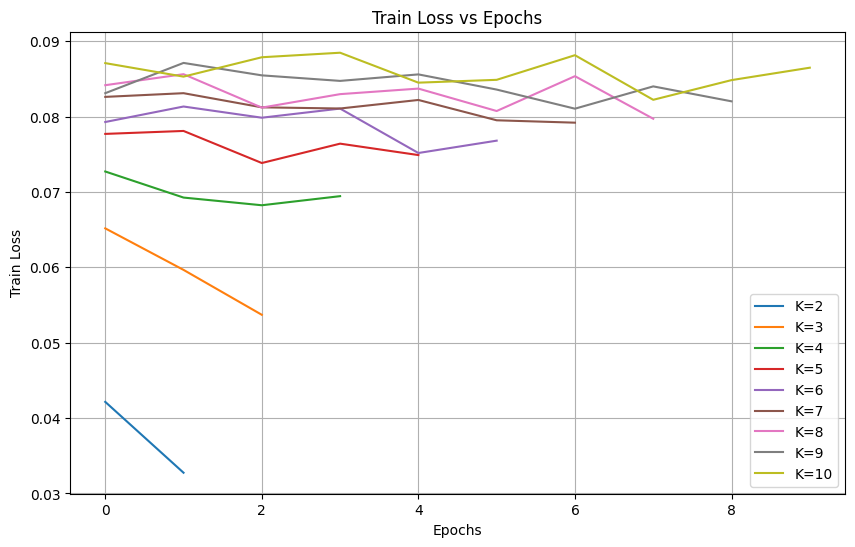

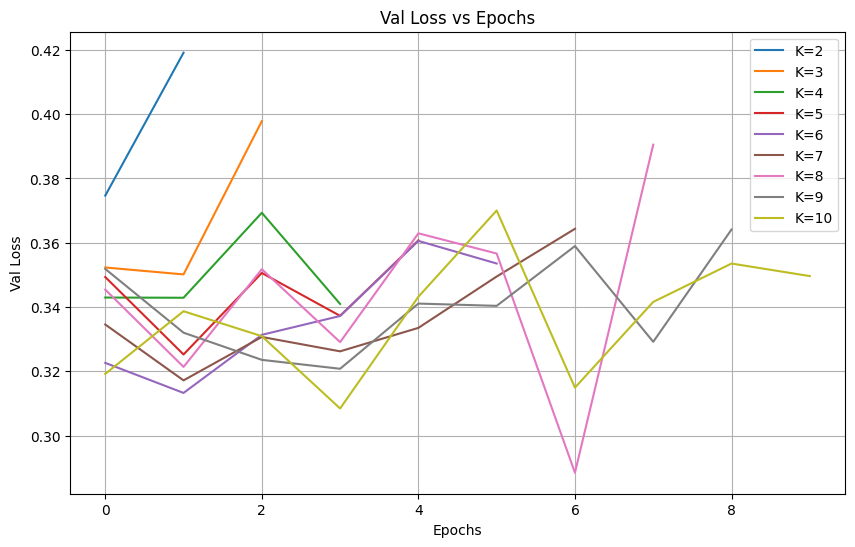

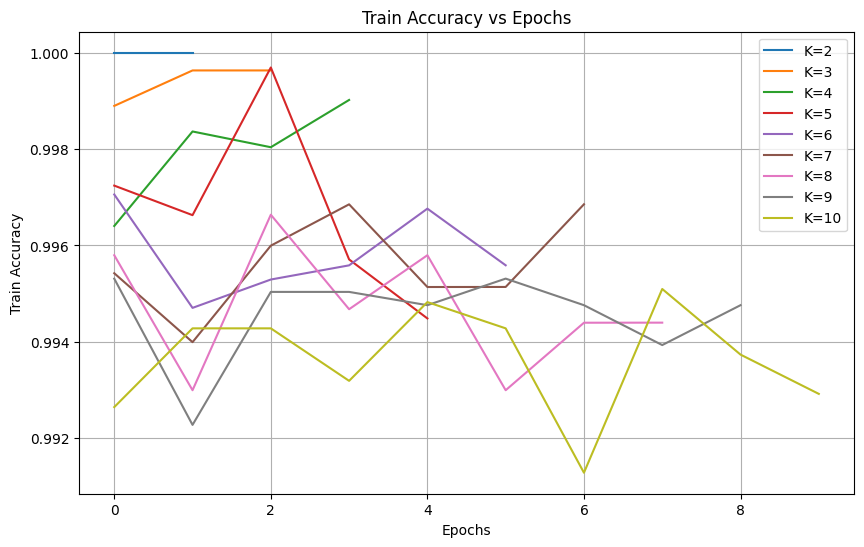

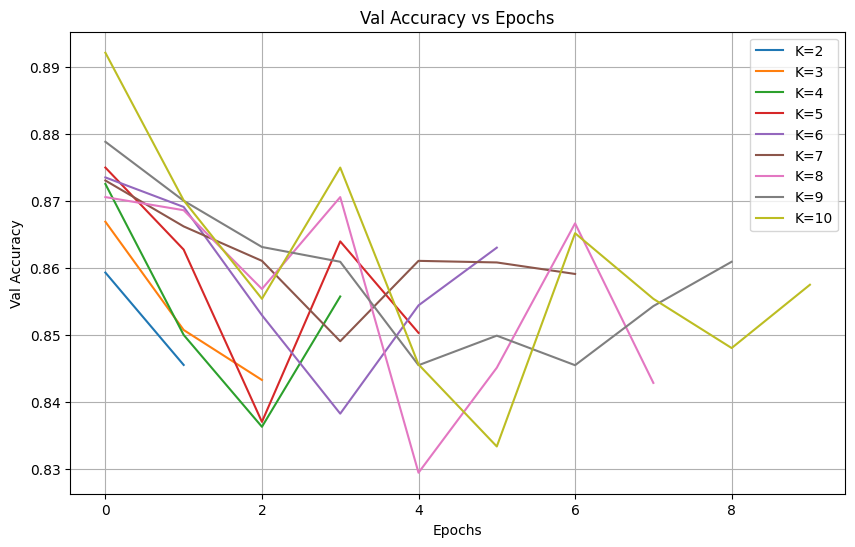

In [44]:
# Plotting Figures
for metric in ["train_loss", "val_loss", "train_accuracy", "val_accuracy"]:
    plt.figure(figsize=(10, 6))
    for k, metrics in results.items():
        plt.plot(metrics[metric], label=f"K={k}")
    plt.title(f"{metric.replace('_', ' ').title()} vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.grid(True)
    plt.show()

**Consistency and less variation in these plots indicate the robustness of the model.**

### Hyper Parameter Tuning Using Optuna

In [45]:
import sklearn
import optuna

In [46]:
def objectivelgb(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_val)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_val, pred_labels)
    return accuracy

We chose the pruning method as Hyperband Pruner as it gradually increases resources for promising trials, discarding the less promising ones early on. It allows exploration of more hyperparameter combinations initially, but then narrows down based on performance. Thus, it is highly computationally efficient when the search space of hyperparameters is large.

In [47]:
study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner)
study.optimize(objectivelgb, n_trials=500)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-10-19 19:18:07,952] A new study created in memory with name: no-name-19e1e922-9c92-4b33-a2af-aa8dad6bd906
[I 2024-10-19 19:18:08,103] Trial 0 finished with value: 0.8525798525798526 and parameters: {'lambda_l1': 8.470841320599646e-08, 'lambda_l2': 1.6105404763858, 'num_leaves': 228, 'feature_fraction': 0.619758822227882, 'bagging_fraction': 0.8460028724578889, 'bagging_freq': 6, 'min_child_samples': 80}. Best is trial 0 with value: 0.8525798525798526.
[I 2024-10-19 19:18:08,393] Trial 1 finished with value: 0.8574938574938575 and parameters: {'lambda_l1': 0.0004652874260041963, 'lambda_l2': 1.775285554250622e-06, 'num_leaves': 74, 'feature_fraction': 0.9561351145414031, 'bagging_fraction': 0.4224636892424011, 'bagging_freq': 6, 'min_child_samples': 15}. Best is trial 1 with value: 0.8574938574938575.
[I 2024-10-19 19:18:08,532] Trial 2 finished with value: 0.855036855036855 and parameters: {'lambda_l1': 3.4125538910577216e-07, 'lambda_l2': 2.207555836825228e-08, 'num_leaves': 1

Number of finished trials: 500
Best trial:
  Value: 0.8845208845208845
  Params: 
    lambda_l1: 1.2475923812257981e-06
    lambda_l2: 1.6659498563207172e-05
    num_leaves: 193
    feature_fraction: 0.9820699825542016
    bagging_fraction: 0.9894582141957871
    bagging_freq: 4
    min_child_samples: 13


In [48]:
optuna.visualization.plot_param_importances(study)

### Quantification of Final Model Performance and Explanation of Predictions using SHAP values

In [49]:
import shap

In [50]:
# This function uses the best trial hyperparameters and evaluates the model
def detailed_objectivelgb(trial): 
    dtrain = lgb.Dataset(X_train, label=y_train)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    print('Final accuracy:',accuracy)
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(y_test, pred_labels))
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, preds)
    
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='lightgbm')
    display.plot() 
    plt.show()
    explainer = shap.TreeExplainer(gbm)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X)
    

Final accuracy: 0.8612334801762115
Confusion Matrix:
 [[367  20]
 [ 43  24]]


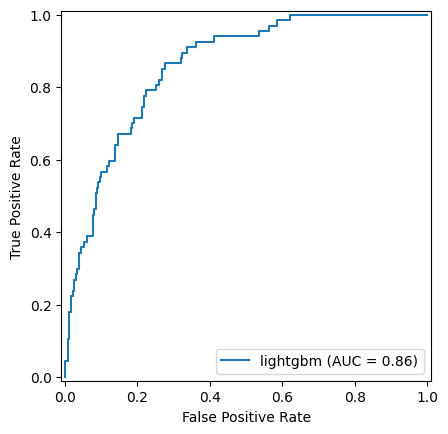

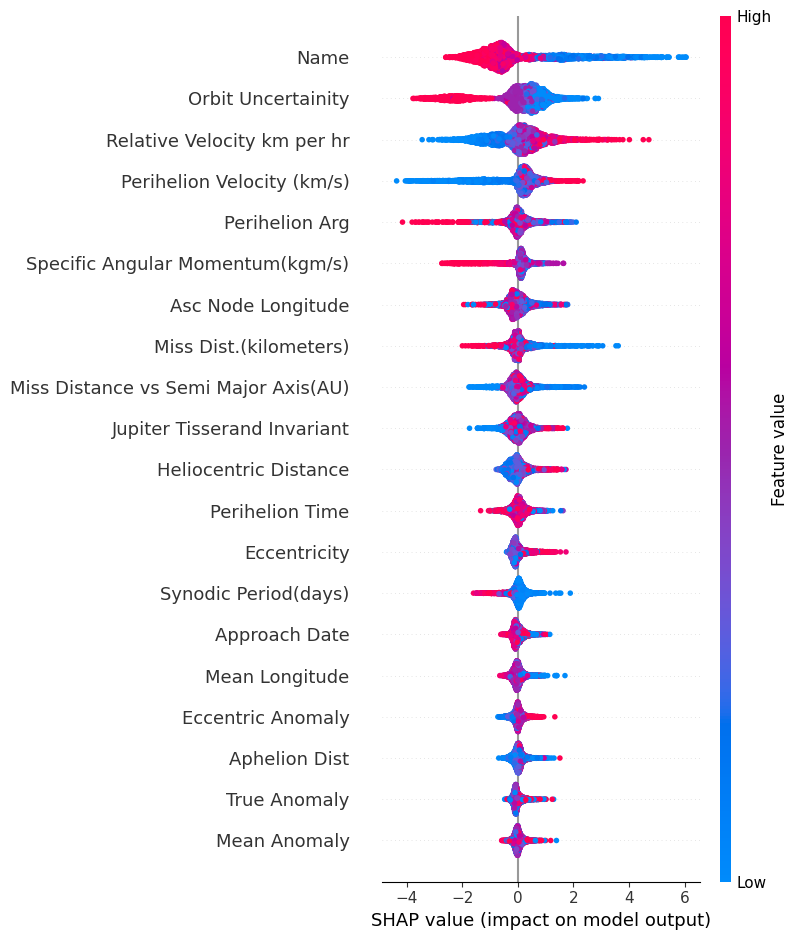

In [51]:
detailed_objectivelgb(study.best_trial)

<h1>Anomaly Detection</h1>
<h5>Isolation Forest is an algorithm specifically designed for anomaly detection. Unlike many other techniques, it doesn’t rely on distance or density calculations but instead focuses on isolating anomalies. The key idea is that anomalies are more easily isolated than normal points due to their rarity and dissimilarity to the majority of the data</h5><br>
<h5>The other method we used is the Z score normalization method, we normalized all the values and compared them with an acceptable threshold and find out all the anomalies.<h5>



In [52]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(df4)

# Predicting the anomalies
df4['anomaly'] = iso_forest.predict(df4)
# df4['anomaly'] = df4['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

df4.head()

,Name,Relative Velocity km per hr,Miss Dist.(kilometers),Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Orbital Period,Orbit Uncertainity,Hazardous,Approach Date,Time Until Approach(days),Miss Distance vs Semi Major Axis(AU),Eccentricity,Orbital Period(days),Orbital Velocity(km/s),Escape Velocity(km/s),Specific Orbital Energy (J/kg),Specific Angular Momentum(kgm/s),Perihelion Velocity (km/s),Aphelion Velocity (km/s),Synodic Period(days),Mean Motion(rads/days),Mean Longitude,Precession Rate,Eccentric Anomaly,True Anomaly,Heliocentric Distance,anomaly
27,2162173.00,48873.91,52470692.00,5.31,1.19,4.39,3.69,1.42,2457797.75,2.69,0.00,0.00,1.00,794448333333333376.00,10820.00,0.29,0.19,473.82,27.31,38.63,-372991163.21,22768569622802589062694615121920.00,33.11,22.53,1594.01,0.01,10.77,0.00,2.76,2.82,1.40,1
55,3648769.00,39036.73,46063436.00,6.38,0.94,3.56,0.41,1.17,2458103.64,4.32,0.00,0.00,0.00,799916000000000000.00,10757.00,0.33,0.25,330.30,30.80,43.56,-474430611.60,17436288536993624517360792633344.00,39.66,23.93,3451.35,0.02,8.30,0.00,4.12,-2.36,1.07,1
73,2154244.00,58051.77,45024037.85,3.37,2.31,3.72,1.71,3.57,2457601.27,1.96,2.00,0.00,0.00,803200000000000000.00,10719.00,0.13,0.55,1279.46,19.61,27.74,-192349248.96,32032905788560893182762121428992.00,36.32,10.59,511.18,0.00,7.39,0.00,2.35,2.70,3.20,-1
88,3414393.00,66663.09,48037404.00,4.57,1.38,1.85,4.26,1.72,2457658.84,5.66,0.00,0.00,0.00,805792000000000000.00,10689.00,0.23,0.25,589.76,25.39,35.91,-322347505.04,25658349180291486364876043976704.00,32.70,19.72,959.47,0.01,11.77,0.00,5.48,-1.00,1.14,1
111,3761271.00,56981.95,49979660.00,7.18,0.80,3.60,5.72,1.10,2458032.74,5.51,0.00,1.00,0.00,809809500000000000.00,10643.00,0.42,0.36,263.53,33.21,46.97,-551509530.58,13879448656573793406457858752512.00,48.54,22.72,946.28,0.02,14.84,0.00,5.19,-1.45,0.67,1


In [53]:

z_scores = np.abs((df4 - df4.mean()) / df4.std())

threshold = 3

anomalies = (z_scores > threshold).any(axis=1)

df4['anomaly_z_scores'] = anomalies.astype(int)

print(f"Number of anomalies detected: {sum(df4['anomaly_z_scores'] == 1)}")

Number of anomalies detected: 437


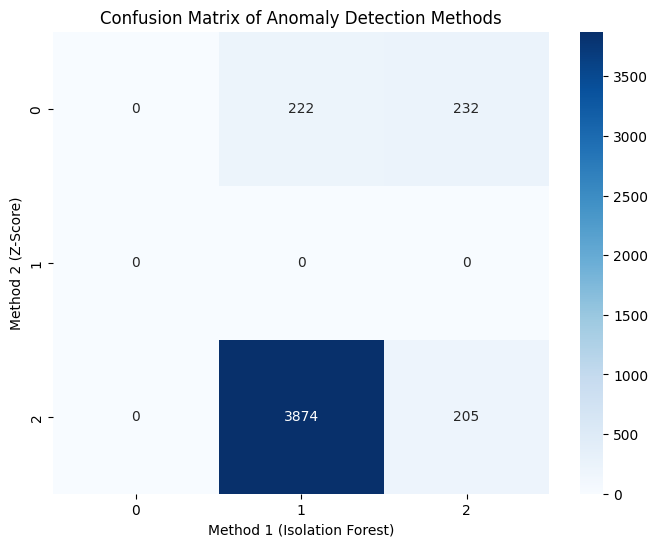

Number of anomalies flagged by both methods: 205


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df4['anomaly'], df4['anomaly_z_scores'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Method 1 (Isolation Forest)')
plt.ylabel('Method 2 (Z-Score)')
plt.title('Confusion Matrix of Anomaly Detection Methods')
plt.show()


df4['anomaly_both'] = ((df4['anomaly'] == 1) & (df4['anomaly_z_scores'] == 1)).astype(int)

num_common_anomalies = df4['anomaly_both'].sum()

print(f"Number of anomalies flagged by both methods: {num_common_anomalies}") #Total of 205 anomalies detected from the intersection of both methods
